# Similarity-Based Learning: Self-Supervised and Supervised 

## 1

$$ N =K$$
$$
p_i = p_{\text{aug}}(\cdot | \text{img}_i), \quad \text{for } i = 1, 2, \dots, K
$$

## 2

**Number of Classes:**

$$
C = N
$$

**Logits Vector $\mathbf{z} $:**
$$
z_j = f(x_i)^\top f(y_j), \quad \text{for } j = 1, 2, \dots, K
$$

**Target Class：**
For ${(x_i,y_i)}$, target class should be $i$,  $\text{for } i = 1, 2, \dots, K$

**Range of Logits Entries:** Given the $f(x_i)$ outputs a unit vector,  the $f(x_i)^\top f(y_j)$ maps the cosine angle between two unit vectors

$$
f(x_i)^\top f(y_j) \in [-1, 1]
$$

## 3

**Euclidean Distance VS Dot Product:**

  $$
  \| u - v \|^2 = (u-v)^\top (u-v)=  \| u \|^2 + \| v \|^2 - 2u^\top v
  $$

**Relation to Cosine Similarity:**

Given $ \| u \| = \| v \| = 1 $:

  $$
  \| u - v \|^2 = 2(1 - u^\top v)
  $$

  Since $ u^\top v = \cos \theta \| u \|\| v \|  $:

  $$
  \| u - v \|^2 = 2(1 - \cos \theta)
  $$

## 4

### 4(a)

(a) ``Yes`` \
(b)  ``No`` \
(c)  ``Yes`` \
(d) ``No``

### 4(b)

$diameter_i(f )$ represents the maximum Euclidean distance between feature vectors within the same set $S_i$.  $margin_{i→j} (f )$ is minimum Euclidean distance between feature vectors across different sets $S_i$,$S_j$


### 4(c)

``ii``

### 4(e)

(i)``smaller``

(ii)``larger``

(iii)(A) The collection of invariance sets is {${S_i}$}

(iii)(B) The extremization in (iii)A potentially leads to non-uniform placement, as points are clustered around constants representing each $S_i$, unlike the roughly uniform distribution sought in the Tammes problem.

### 4(f)

``No``

When $p_i$ and $p_j$ have overlapping support, an optimal encoder $f$ will place feature vectors from the overlapping region close together, potentially causing misclassification for pairs ($x_i$,$y_j$) in this region.

## 5

``No``

Yes. As we relax the constraints, the output of $f(x_i)$ may have larger magnitude than 1. Let $f(x_i) ^\top f(y_i)  \rightarrow \alpha^2 f(x_i)^\top f(y_i) $. As $\alpha$  becomes very large, the numerator grows exponentially faster than denominator for $i\neq j $
$$ - \log \left( \frac{e^{\alpha^2 f(x_i)^\top f(y_i)}}{\sum_{j=1}^N e^{\alpha^2 f(x_i)^\top f(y_j)}} \right) \rightarrow - \log(1) = 0 $$

As for numerical stability, scaling up the outputs can cause numerical overflow in exponential computations, for instance the encoder learns an extreme 'shortcut', scaling $f(x_i) ^\top f(y_i)$ even to infinity to minimize the contrastive loss, leading to instability during training.


## 6

We can difine $f_1(x)$ as $g(x)$ and use $f_2(x)$ as one-hot encoding as class labels, which maps the indexing to product of two vectors.
$$ N = C $$
$$p_i = \text{Uniform}\left( \{ x_k \mid y_k = i \} \right)$$
$$d = C$$
$$ X_1 = X $$
$$ X_2 = \{1, 2, \dots, C\} $$
$$ f_1(x) = g(x) \in \mathbb{R}^C $$
$$ f_2(c) = e_c \in \mathbb{R}^C \text{(one-hot encoding of class label)}$$ 
$$ L_{\text{dual-enc-contr}}(f_1, f_2) = L_{\text{xce}}(g) $$

Under the mapping defined above,  we have $f_1(x)^\top f_2(y_j) = g(x)^\top e_{y_j} = g(x)[y_j]$ \
Therefore $$\hat{y}_{\text{Contr}} = \arg\max_{j \in \{1, 2, \dots, C\}} g(x)[j]$$
$$\hat{y}_{\text{CE}} = \hat{y}_{\text{Contr}}$$
$$\mathbf{1} \{\hat{y}_{\text{CE}} = y\} = \mathbf{1} \{\hat{y}_{\text{Contr}} = y\}$$
$$\text{Accuracy}_{\text{CE}} = \text{Accuracy}_{\text{Contr}}$$

# Reconstruction and Similarities in Representation Learning 

## 7

### 7(a)

(i) ``Yes`` Given each $x$ is distinct and $f^*(x_i)$ allows for prefect reconstruction, there exists a function $h$ mapping back of $f^*(x_i)$ to its dataset index $i$\
(ii) ``Yes`` Since $f^*(x_i)$ allows for prefect reconstruction, the color information must be encoded within $f^*(x_i)$, so we can find a $h(f^*(x_i))$ to extract color information.\
(iii) ``Maybe`` Besides color, location and shape are also variables and will decide the distance between $x,y,z$ in representation space\
(iv)``Maybe`` if $x$ is outside training dataset, we can't garantee a function $h$ as in (ii) to extract color with probability 1\
(v)``Maybe`` because we don't have knowledge of how unseen data points relate to those in the training set\
(vi)``Maybe`` The unseen data may have different background color than training set


### 7(b)

```python
# FIXME
recon = dec(enc(batch))
loss = F.mse_loss(batch, recon)

### 7(c)


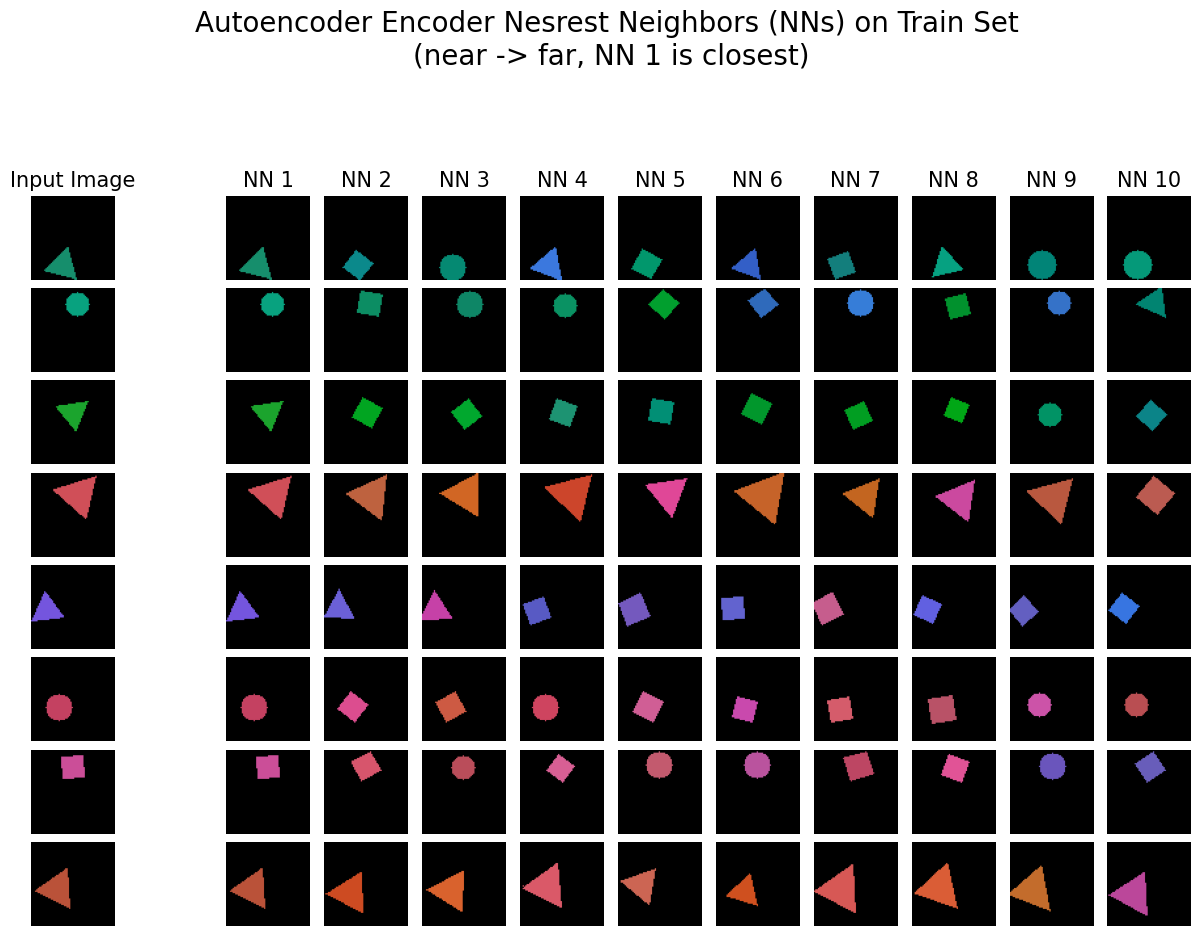

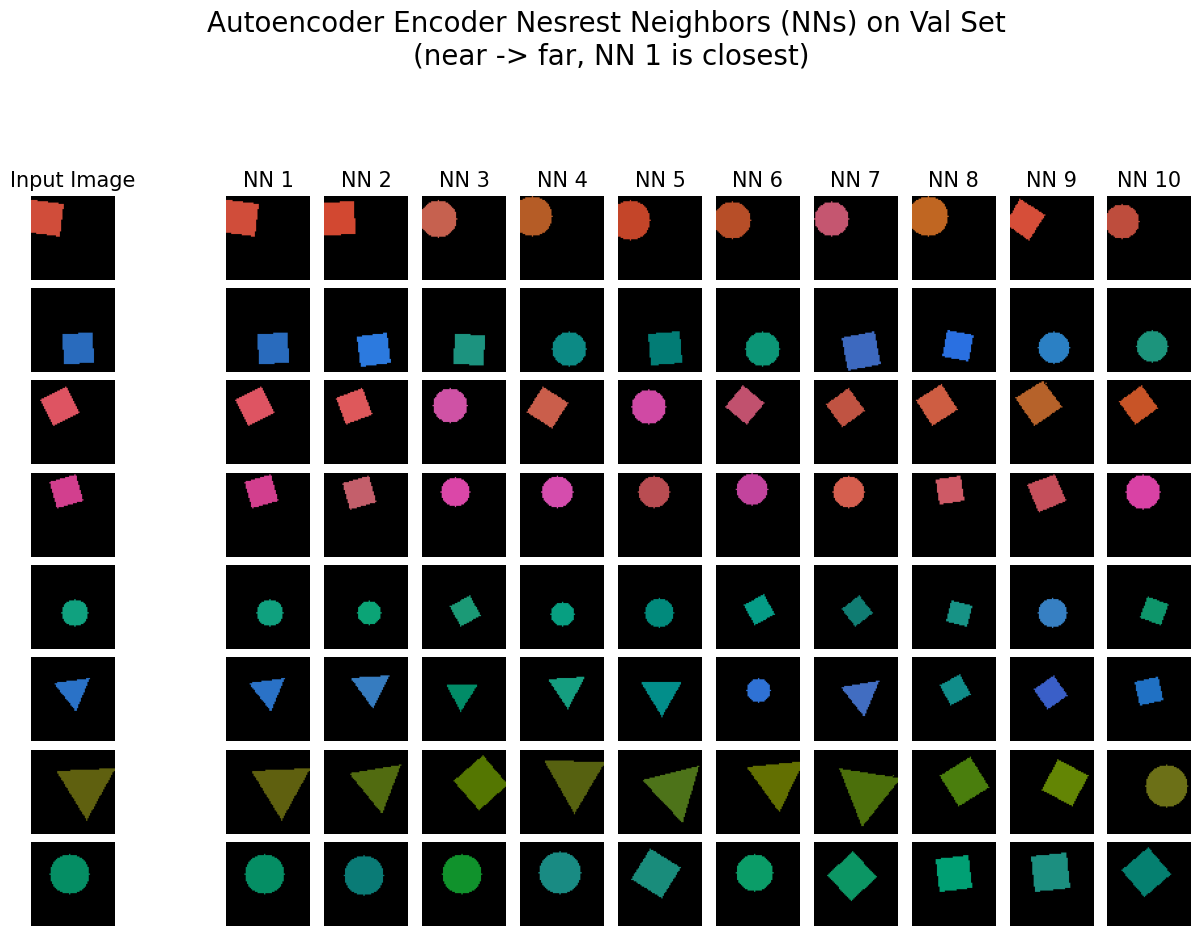

### 7(d)

**（i)** Yes, the representation learned by the autoencoder is meaningful for both training and validation images.Specifically, images with similar color, size, and location tend to be close to each other in the latent space, even if their shapes differ slightly. 

**(ii)** The observed clustering occurs because the autoencoder, while minimizing reconstruction MSE, implicitly learns to represent images with similar features in nearby regions of the latent space. Features like color, size, and location significantly impact the pixel-wise reconstruction loss, so the encoder learns to map images sharing these attributes to similar latent representations to reconstruct them accurately. For better grouping/smoothness we could consider using a Variational Autoencoder (VAE) imposes a prior distribution on the latent space

## 8

### 8(a)

 ```python
 # FIXME
contr_mat = torch.matmul(enc(batch1), enc(batch2).T) / tau
loss_fn = nn.CrossEntropyLoss()
y_labels = torch.arange(batch1.size(0)).to(device)
loss = loss_fn(contr_mat, y_labels)

### 8(b)
(i) invariant to color, sensitive to shape and location\
(ii) invariant to location, sensitive to color and shape\
(iii) invariant to shape and location, sensitive to color

### 8(c)

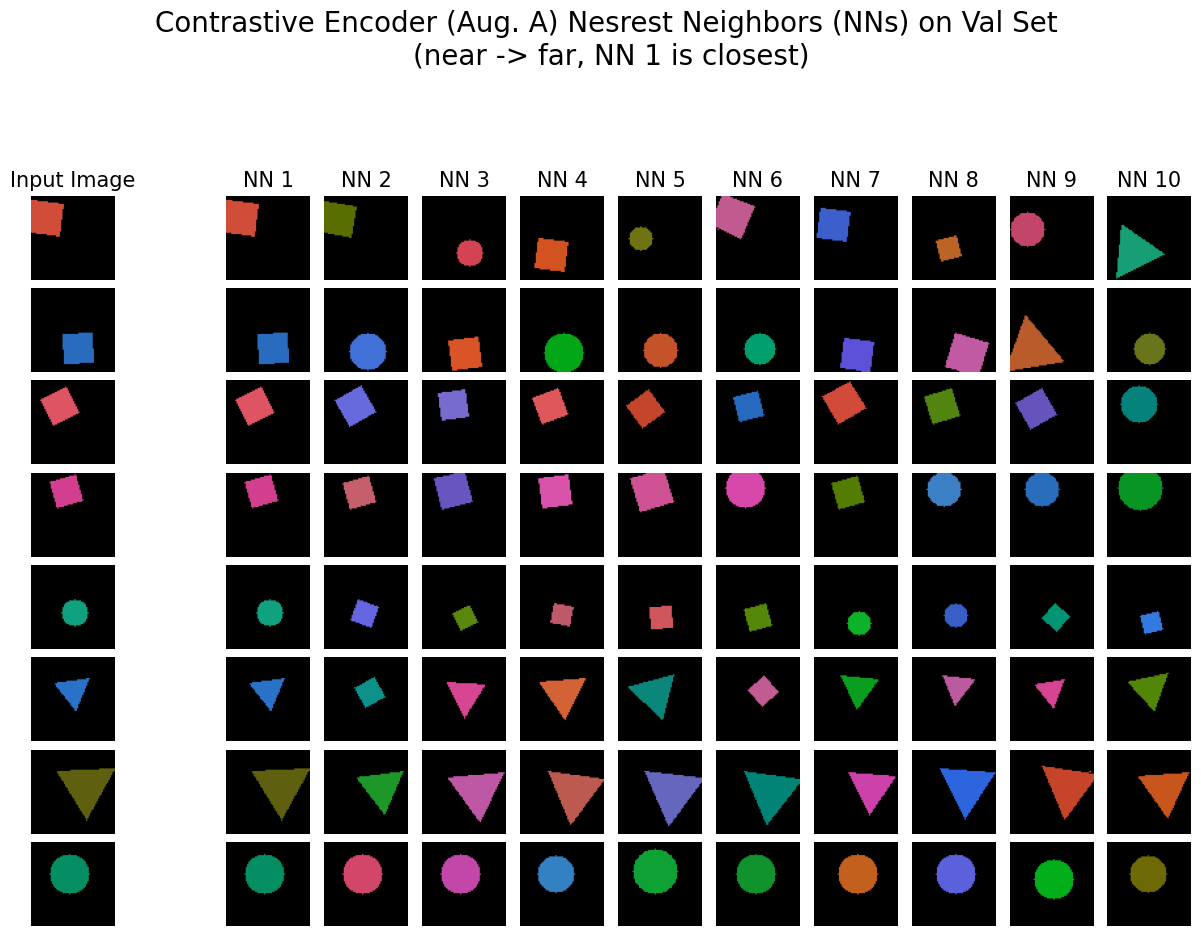

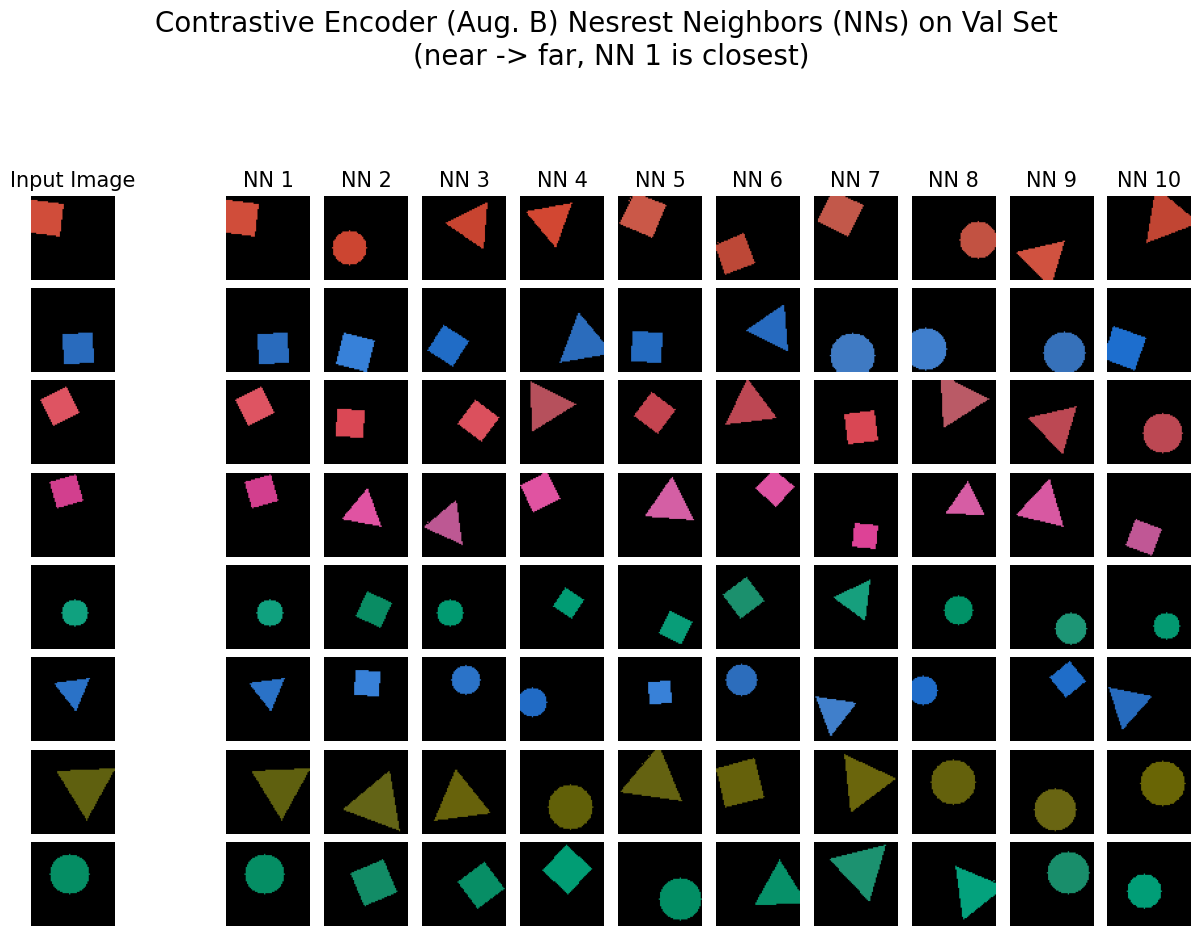

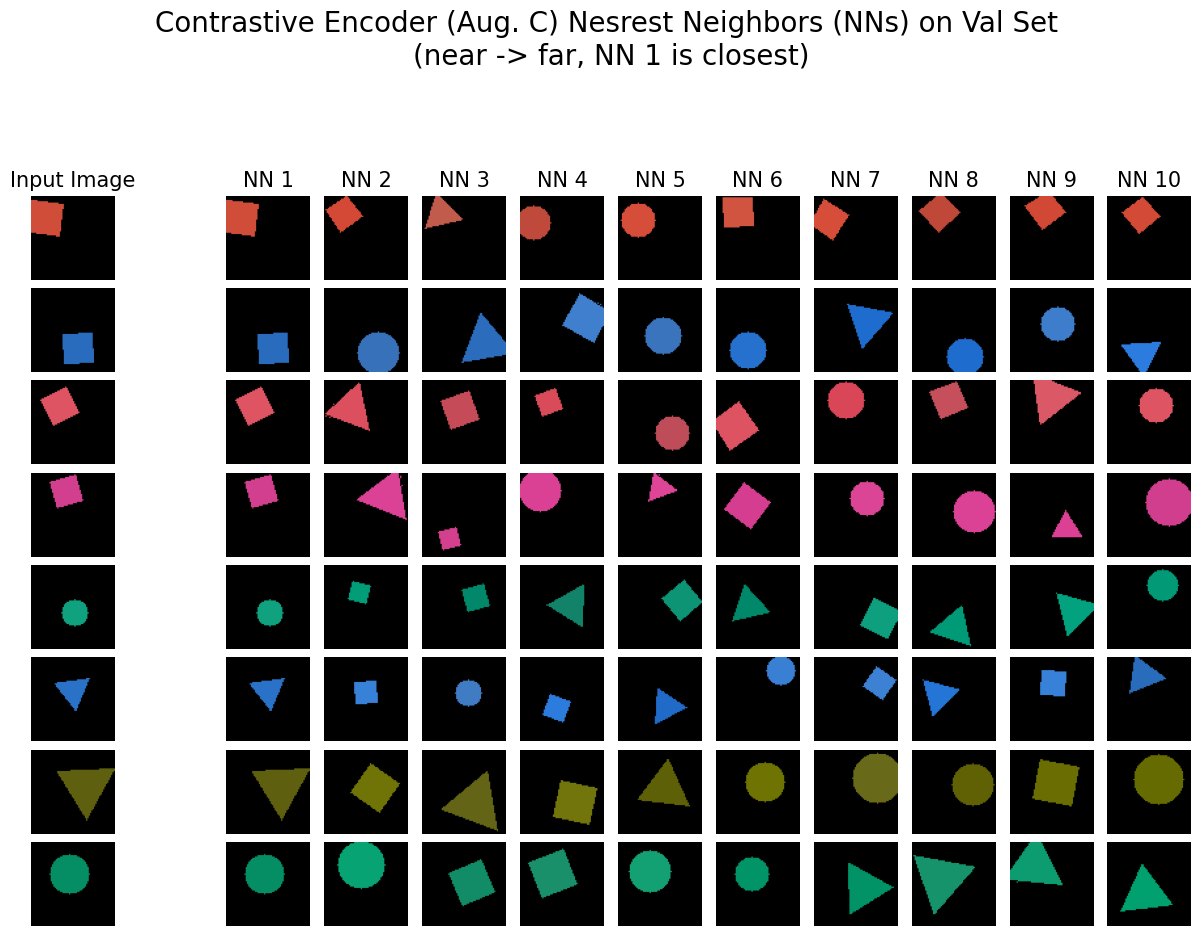

### 8(d)

**(i)** Sensitive to color, invariant to location and shape\
**(ii)** No, the nearest neighbor plots are not consistent with the assumptions in Question 8b, as Augmentation B unexpectedly shows invariance to shape and location.\
**(iii)** Color is easiest for the encoder to learn as it directly maps to pixel values. Location is harder to learn due to the shift invariance of CNNs, which reduces sensitivity to precise positional changes, and shape can be challenging if color dominates the learned similarity